In [4]:
import pandas as pd



In [5]:
# Make sure 'RFM_Input.xlsx' is in the same folder as your notebook
df = pd.read_excel('RFM_Input.xlsx', engine='openpyxl')

# Rename columns to simpler names
df = df.rename(columns={
    'Row Labels': 'CustomerID',
    'Min of Recency': 'Recency',
    'Sum of Quantity': 'Frequency',
    'Sum of Profit': 'Monetary'
})

# Verify data loaded correctly
print("First 5 rows:")
display(df.head())

First 5 rows:


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,B-25601,364,19,-1218,NaN,NaN,NaN
1,B-25602,364,22,975,NaN,NaN,NaN
2,B-25603,362,25,-180,NaN,NaN,NaN
3,B-25604,362,11,22,NaN,NaN,NaN
4,B-25605,360,7,0,NaN,NaN,NaN


In [6]:
def calculate_r_score(recency):
    if recency == 364 or recency > 253: return 1
    elif recency >= 253 or recency > 145: return 2
    elif recency >= 145 or recency > 65: return 3
    else: return 4

def calculate_f_score(frequency):
    if frequency == 57 or frequency > 35: return 4
    elif frequency >= 35 or frequency > 15: return 3
    elif frequency >= 15 or frequency > 5: return 2
    else: return 1

def calculate_m_score(monetary):
    if monetary == 1970 or monetary > 500: return 4
    elif monetary >= 500 or monetary > 22: return 3
    elif monetary >= 22 or monetary > -22: return 2
    else: return 1

In [7]:
# Apply scoring functions
df['R_Score'] = df['Recency'].apply(calculate_r_score)
df['F_Score'] = df['Frequency'].apply(calculate_f_score)
df['M_Score'] = df['Monetary'].apply(calculate_m_score)

# Calculate composite RFM score
df['RFM_Score'] = (df['R_Score'] * 100) + (df['F_Score'] * 10) + df['M_Score']

# Verify calculations
print("\nScores calculated:")
display(df[['CustomerID', 'R_Score', 'F_Score', 'M_Score', 'RFM_Score']].head())


Scores calculated:


,CustomerID,R_Score,F_Score,M_Score,RFM_Score
0,B-25601,1,3,1,131
1,B-25602,1,3,4,134
2,B-25603,1,3,1,131
3,B-25604,1,2,2,122
4,B-25605,1,2,2,122


In [8]:
def segment_customer(score):
    if score == 444 or score > 421: return "Platinum"
    elif score >= 421 or score > 277: return "Gold"
    elif score >= 277 or score > 194: return "Silver"
    else: return "Bronze"

df['Segment'] = df['RFM_Score'].apply(segment_customer)

# Show segment distribution
print("\nCustomer segments:")
display(df['Segment'].value_counts())


Customer segments:


Segment
Gold        174
Bronze      125
Silver      125
Platinum     76
Name: count, dtype: int64

In [9]:
# Save to new Excel file
df.to_excel('RFM_Results.xlsx', index=False)
print("\nResults saved to 'RFM_Results.xlsx'")

# Show top customers
print("\nTop 10 Customers:")
top_customers = df.sort_values('RFM_Score', ascending=False).head(10)
display(top_customers[['CustomerID', 'RFM_Score', 'Segment']])


Results saved to 'RFM_Results.xlsx'

Top 10 Customers:


,CustomerID,RFM_Score,Segment
454,B-26055,444,Platinum
450,B-26051,444,Platinum
398,B-25999,443,Platinum
455,B-26056,443,Platinum
472,B-26073,434,Platinum
447,B-26048,434,Platinum
392,B-25993,434,Platinum
492,B-26093,434,Platinum
384,B-25985,433,Platinum
442,B-26043,433,Platinum


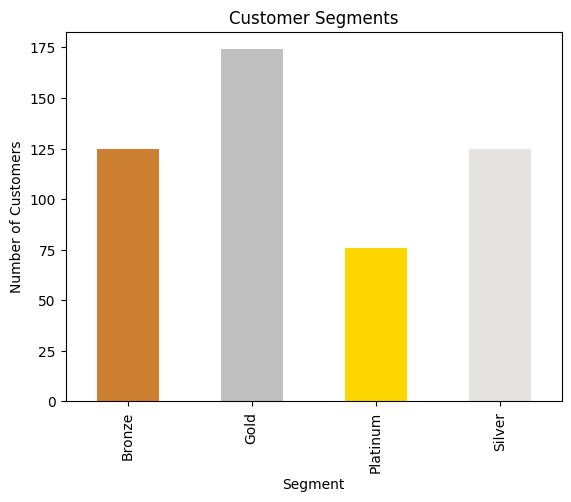

In [10]:
import matplotlib.pyplot as plt

# Plot segment distribution
df['Segment'].value_counts().sort_index().plot(
    kind='bar', 
    color=['#CD7F32', '#C0C0C0', '#FFD700', '#E5E4E2'],
    title='Customer Segments'
)
plt.ylabel('Number of Customers')
plt.show()

In [11]:
import os
print("Output saved to:", os.path.abspath("RFM_Results.xlsx"))

Output saved to: C:\Users\zayan\PROJECTS\E-Sales KPI Dashboard\RFM_Results.xlsx
